#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading dataset into dataframe

In [3]:
df = pd.read_csv('C:\\Users\\HP\\Downloads\\kaggle\\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# dropping id columns since its of no importance
df.drop(['Id'], axis=1, inplace=True)

### Information about Dataset

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.shape

(150, 5)

In [12]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [17]:
#Eliminating duplicate rows
df = df[~(df.duplicated())]
df.shape

(147, 5)

In [18]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Exploratory Data Analysis

Skewness of SepalLengthCm 0.29255956516307163
Kurtosis of SepalLengthCm -0.5569564812003911
Boxplot of SepalLengthCm


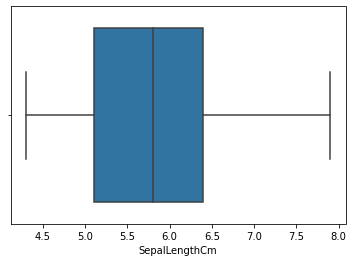

Distribution of SepalLengthCm


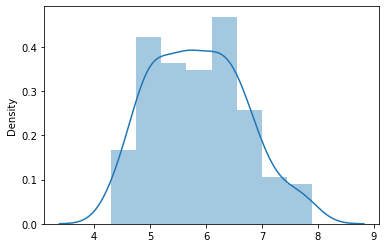

Skewness of SepalWidthCm 0.3243506195620299
Kurtosis of SepalWidthCm 0.24683840744328434
Boxplot of SepalWidthCm


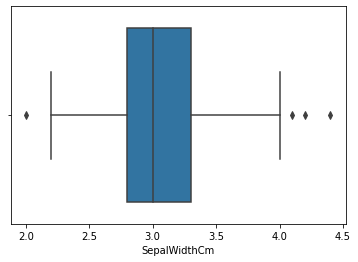

Distribution of SepalWidthCm


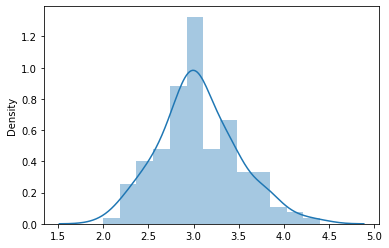

Skewness of PetalLengthCm -0.2937634574565383
Kurtosis of PetalLengthCm -1.3744621135069286
Boxplot of PetalLengthCm


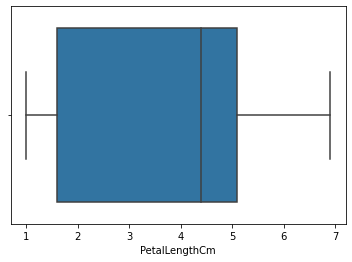

Distribution of PetalLengthCm


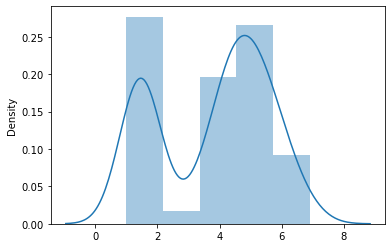

Skewness of PetalWidthCm -0.11347861374619836
Kurtosis of PetalWidthCm -1.3177600111364542
Boxplot of PetalWidthCm


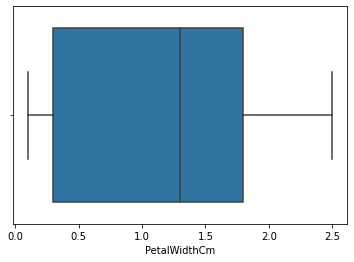

Distribution of PetalWidthCm


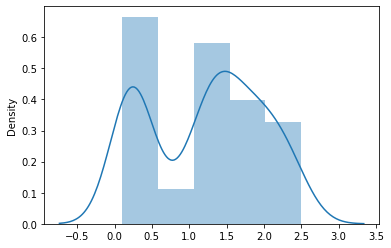

In [23]:
for col in df.columns:
    if df[col].dtypes == 'float64':
        print('Skewness of {}'.format(col), df[col].skew())
        print('Kurtosis of {}'.format(col), df[col].kurt())
        print('Boxplot of {}'.format(col))
        sns.boxplot(x=col, data=df)
        plt.show()
        print('Distribution of {}'.format(col))
        sns.distplot(x=df[col])
        plt.show()

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

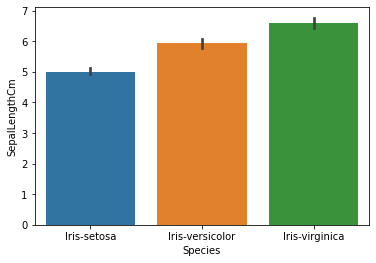

In [24]:
sns.barplot(x='Species', y='SepalLengthCm', data=df)

#### Observation: virginica species has more sepallength that other species
#### Sepallength : virginica > versicolor > setosa

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

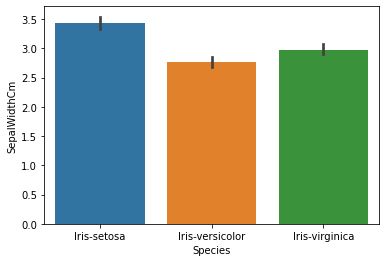

In [25]:
sns.barplot(x='Species', y='SepalWidthCm', data=df)

#### Observation: setosa species has more sepalwidth that other species
#### SepalWidth : versicolor < virginica < setosa

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

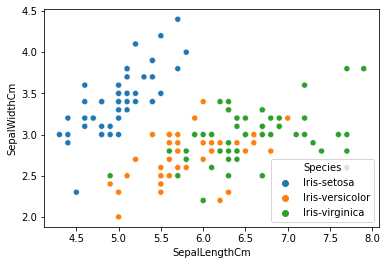

In [29]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

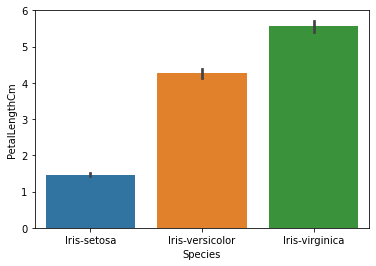

In [31]:
sns.barplot(x='Species', y='PetalLengthCm', data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

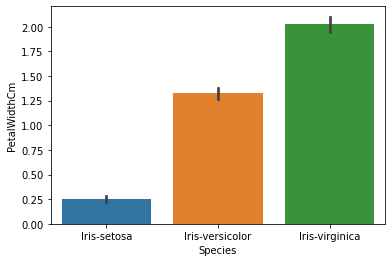

In [32]:
sns.barplot(x='Species', y='PetalWidthCm', data=df)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

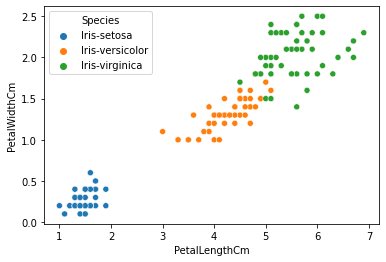

In [33]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species')

([<matplotlib.patches.Wedge at 0x176f5e04b80>,
 [Text(0.5776548976824366, 1.0518150118644882, 'Iris-versicolor'),
  Text(-1.0989953336498821, -0.04700272987587277, 'Iris-virginica'),
  Text(0.5702318449125436, -0.9406570273206047, 'Iris-setosa')],
 [Text(0.3369653569814214, 0.6135587569209515, '34.01%'),
  Text(-0.599452000172663, -0.025637852659566963, '33.33%'),
  Text(0.3110355517704783, -0.5130856512657843, '32.65%')])

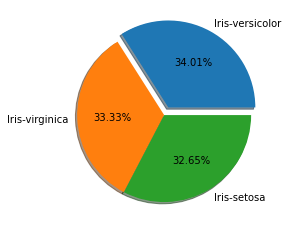

In [35]:
plt.pie(df.Species.value_counts().values, labels=df.Species.value_counts().keys(), explode=(0.1,0,0), shadow=True, autopct='%1.2f%%')

<AxesSubplot:>

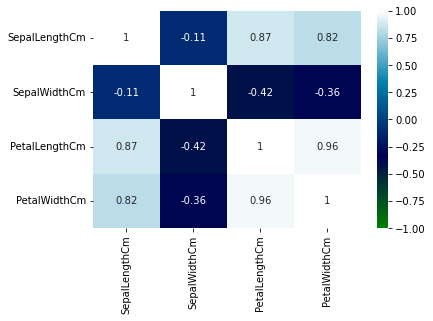

In [40]:
sns.heatmap(df.corr(), cmap='ocean', annot=True, vmin=-1, vmax=1)

### Scaling the feature values

In [41]:
from sklearn.preprocessing import StandardScaler

In [43]:
x = df.drop(['Species'], axis=1)
y= df[['Species']]


In [44]:
scale_x = StandardScaler()
scale_x = scale_x.fit_transform(x)
scale_x

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914],
       [-0.55243423,  1.47919283, -1.30069567, -1.33570001],
       [-1.27858474,  0.79036069, -1.24365442, -1.33570001],
       [-1.27858474, -0.12808217, -1.35773692, -1.46809914],
       [-1.88371017, -0.12808217, -1.52886066, -1.46809914],
       [-0.06833389,  2.16802498, -1.47181942, -1.33570001],
       [-0.18935898,  3.08646783, -1.30069567, -1.07090176],
       [-0.55243423,  1.

In [46]:
scale_x = pd.DataFrame(scale_x, columns=x.columns)
scale_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.915509,1.019971,-1.357737,-1.3357
1,-1.157560,-0.128082,-1.357737,-1.3357
2,-1.399610,0.331139,-1.414778,-1.3357
3,-1.520635,0.101529,-1.300696,-1.3357
4,-1.036535,1.249582,-1.357737,-1.3357


### Model Building: K- Means Clustering

In [47]:
from sklearn.cluster import KMeans

In [56]:
ll=[]
el= []
for k in range(2,15):
    for algo in ['lloyd', 'elkan']:
        model = KMeans(init='k-means++', algorithm=algo, n_clusters=k)
        model = model.fit(scale_x)
        if algo == 'lloyd':
            ll.append(model.inertia_)
        else:
            el.append(model.inertia_)
d = {}
d['lloyd'] = ll
d['elkan'] = el
    
    

In [57]:
ll

[220.85907940742362,
 138.25771133117863,
 112.90751031641204,
 89.83564615155609,
 79.39565890379575,
 71.60211159859212,
 61.78134417652017,
 55.15653200264536,
 46.71917634122039,
 42.25502746963446,
 40.5044818850083,
 36.595256099342826,
 34.28928359327052]

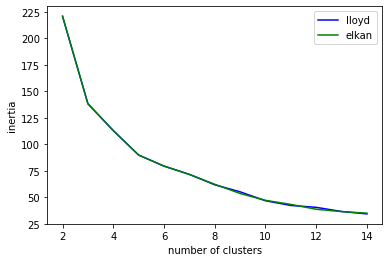

In [61]:
#finding best value of k(n_clusters)

plt.plot(range(2,15), d['lloyd'], color='blue', label='lloyd' )
plt.plot(range(2,15), d['elkan'], color='green', label='elkan' )
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.legend()
plt.show()

#### From above plot its clear that elbow at k value 3

In [63]:
#model using best parameter n_clusters = 3 and algo=elkan

model = KMeans(init='k-means++', algorithm='elkan', n_clusters=3)
model = model.fit(scale_x)
y_pred = model.labels_

In [64]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

In [65]:
# silhouette score calculation
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(scale_x, y_pred)
sil_score

0.4572716133419621

In [66]:
x = df.drop(['Species'], axis=1)

In [67]:
sil_score = silhouette_score(x, y_pred)
sil_score

0.5038502819860474

In [95]:
# without scaling we were getting more accuracy (silhouette_score =0.5)
model = KMeans(init='k-means++', algorithm='elkan', n_clusters=3)
model = model.fit(x)
y_pred = model.labels_

In [96]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

In [97]:
df['pred_species'] = y_pred

In [98]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,pred_species
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

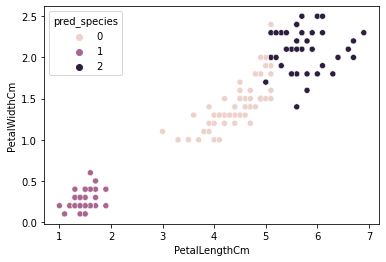

In [99]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='pred_species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

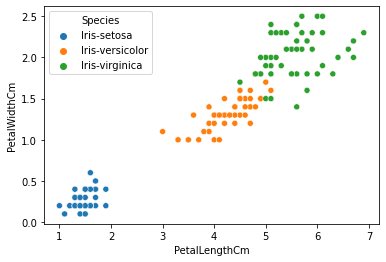

In [100]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species')

In [101]:
#0-setosa, 1-versicolor, 2=virginica
def spe(specie_num):
    if specie_num == 1:
        return 'Iris-setosa'
    elif specie_num == 0:
        return 'Iris-versicolor'
    else:
        return 'Iris-virginica'
    
    

In [102]:
df['pred_species'] = df['pred_species'].apply(spe)
df['pred_species'].head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: pred_species, dtype: object

In [103]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,pred_species
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

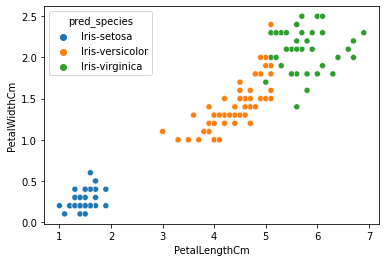

In [104]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='pred_species')

In [110]:
df[df['pred_species']!=df['Species']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,pred_species
52,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica,Iris-versicolor
113,5.7,2.5,5.0,2.0,Iris-virginica,Iris-versicolor
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica,Iris-versicolor
121,5.6,2.8,4.9,2.0,Iris-virginica,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica,Iris-versicolor
126,6.2,2.8,4.8,1.8,Iris-virginica,Iris-versicolor
